# Receptor Comparative Analysis

**Goals:** 
1. Find receptors that are highly expressed in NMU+ neurons (dot plot).
2. Cluster on the graph genes that fit:

Genes that are expressed in NMUen on a X proportion of cells. For each receptor gene, calculate the proportion of cells in your neuronal subset that express the gene above a certain threshold (e.g., >0 counts or log-normalized expression value >0). Set a threshold for minimum expression level (like a minimum number of counts) and minimum percentage of cells expressing the gene to consider it as "expressed." For example, a receptor gene could be considered "expressed" if more than 60% of cells show non-zero expression.



# Imports 

In [3]:
import os
import pandas as pd
import numpy as np

import scanpy as sc
import warnings

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Some plotting settings from Setty Lab
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

In [38]:
# matplotlib.rcdefaults()

# Load Data

In [5]:
morarach_ad = sc.read_h5ad('morarach_preprocessed_annotated.h5ad')
morarach_ad

AnnData object with n_obs × n_vars = 5298 × 17664
    obs: 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden_1.5', 'doublet_score', 'predicted_doublet', 'leiden_1.0', 'leiden_0.8', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'hvg', 'leiden_0.6', 'leiden_0.6_colors', 'leiden_0.7', 'leiden_0.7_colors', 'leiden_0.8', 'leiden_0.8_colors', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_1.5', 'leiden_1.5_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_counts', 'normalized_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

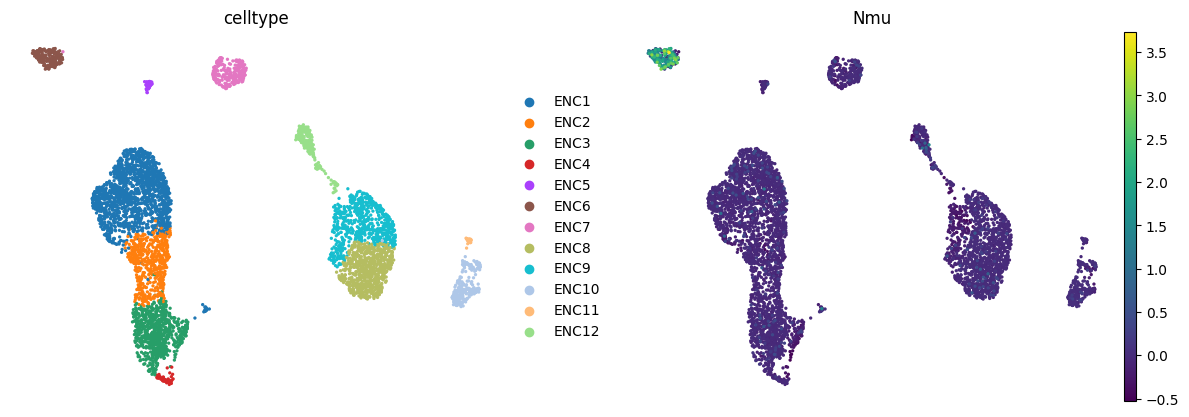

In [36]:
sc.pl.umap(morarach_ad, color=['celltype', 'Nmu'], frameon=False)

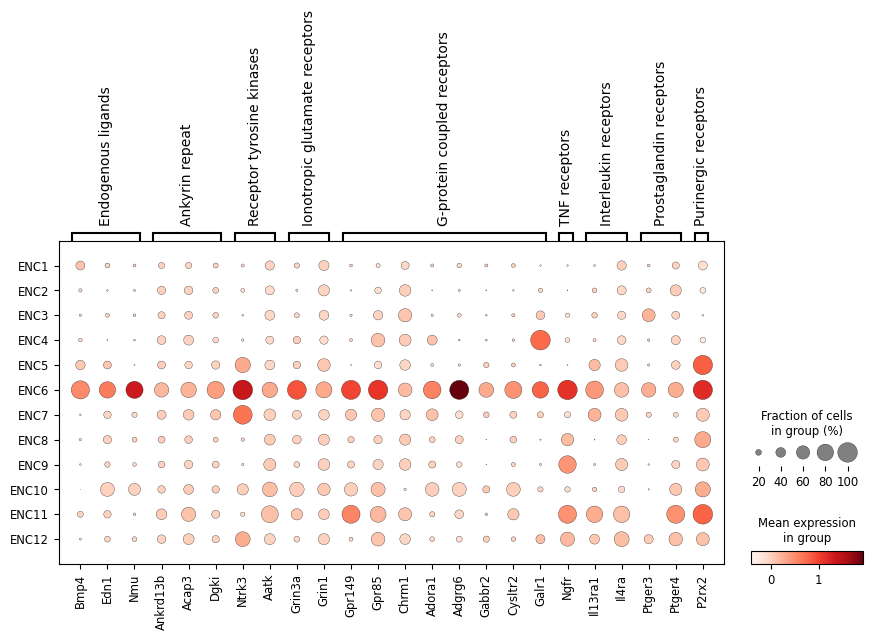

In [22]:
# Example:
markers = {'Endogenous ligands': ['Bmp4', 'Edn1', 'Nmu'],
          'Ankyrin repeat': ['Ankrd13b', 'Acap3', 'Dgki'],
          'Receptor tyrosine kinases': ['Ntrk3', 'Aatk'],
          'Ionotropic glutamate receptors': ['Grin3a', 'Grin1'],
          'G-protein coupled receptors': ['Gpr149', 'Gpr85', 'Chrm1','Adora1', 'Adgrg6', 'Gabbr2', 'Cysltr2', 'Galr1'],
          'TNF receptors': ["Ngfr"],
          'Interleukin receptors': ['Il13ra1', 'Il4ra'],
          'Prostaglandin receptors': ['Ptger3', 'Ptger4'],
          'Purinergic receptors': ['P2rx2']}

dot = sc.pl.dotplot(morarach_ad, markers, groupby='celltype')

# Find NMUen Receptors

Find highly expressed NMUen (ENC6) receptors. These receptors don't have to be differentially expressed as shown in the dot plot. You can find receptor genes through the following sources:
- https://www.guidetopharmacology.org/targets.jsp
- https://www.nature.com/articles/s41593-020-00736-x#data-availability ("Supplementary Information" section)

In [33]:
nmuen_subset = morarach_ad[morarach_ad.obs['celltype'] == 'ENC6'].copy()
nmuen_subset

AnnData object with n_obs × n_vars = 189 × 17664
    obs: 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden_1.5', 'doublet_score', 'predicted_doublet', 'leiden_1.0', 'leiden_0.8', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'hvg', 'leiden_0.6', 'leiden_0.6_colors', 'leiden_0.7', 'leiden_0.7_colors', 'leiden_0.8', 'leiden_0.8_colors', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_1.5', 'leiden_1.5_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_counts', 'normalized_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [34]:
# gene expression dataframe
nmuen_expr_df = pd.DataFrame(nmuen_subset.layers['log_counts'].toarray(), index=nmuen_subset.obs_names, columns=nmuen_subset.var_names)
nmuen_expr_df

,Xkr4,Gm1992,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,...,mt-Cytb,Vamp7,Spry3,Tmlhe,CR974586.5,AC132444.6,AC168977.1,PISD,DHRSX,CAAA01147332.1
2_AAAGGGCTCTTTCCAA-1-0,0.000000,0.0,0.836517,0.171346,0.0,1.176444,0.171346,0.836517,0.000000,1.053970,...,4.405847,1.117081,0.000000,0.000000,0.0,0.0,0.0,0.171346,0.317583,0.000000
2_AAAGGTAAGCAACTCT-1-0,0.000000,0.0,1.089612,0.198224,0.0,0.363581,0.198224,0.363581,0.000000,0.505435,...,4.421409,1.013013,0.198224,0.000000,0.0,0.0,0.0,0.363581,0.198224,0.198224
2_AAAGTCCTCACAGTGT-1-0,0.000000,0.0,0.000000,0.952983,0.0,0.585961,0.000000,0.000000,0.000000,1.754457,...,5.474041,1.220875,0.786217,0.000000,0.0,0.0,0.0,1.754457,0.335299,0.000000
2_AATGACCCATTGTAGC-1-0,0.000000,0.0,0.583342,0.583342,0.0,0.782999,0.000000,0.583342,0.000000,0.583342,...,4.738462,0.583342,0.000000,0.000000,0.0,0.0,0.0,0.583342,0.583342,0.000000
2_ACATCCCCACAACCGC-1-0,0.000000,0.0,0.000000,0.465970,0.0,0.465970,0.000000,0.465970,0.000000,1.517621,...,5.321013,0.465970,0.259884,0.000000,0.0,0.0,0.0,0.465970,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_TTCAGGAAGAGACAAG-1-1,0.000000,0.0,0.835956,0.232225,0.0,0.943292,0.000000,0.420556,0.000000,0.715698,...,4.934626,0.715698,0.000000,0.000000,0.0,0.0,0.0,0.578976,0.715698,0.000000
1_TTCCACGAGCATGAAT-1-1,0.000000,0.0,0.000000,1.351410,0.0,1.351410,0.000000,1.351410,0.000000,0.000000,...,1.905941,1.351410,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1_TTGGGATTCGAACCTA-1-1,0.411935,0.0,0.702836,0.411935,0.0,0.411935,0.000000,1.111510,0.000000,0.702836,...,5.795329,0.702836,0.000000,0.000000,0.0,0.0,0.0,0.927906,0.411935,0.000000
1_TTGGGCGGTACCCGAC-1-1,0.000000,0.0,0.658606,0.382571,0.0,0.658606,0.000000,0.382571,0.382571,0.000000,...,5.535751,0.382571,0.382571,0.382571,0.0,0.0,0.0,0.658606,0.382571,0.000000


In [ ]:
nmuen_expr_df

In [42]:
# !! Just an example !! These may not actually be receptors ~
receptors = ['Adcyap1', 'Adipoq', 'Adm', 'Adm2', 'Agrp', 'Agt', 'Amh', 'Anxa1', 'Apln', 
             'App', 'Areg', 'Arf1', 'Arhgdib', 'Artn', 'Avp', 'Bdnf', 'Bid', 'Bmp10', 
             'Bmp2', 'Bmp4', 'Bmp5', 'Bmp6', 'Bmp7', 'Bmp8a', 'C3', 'Calca', 'Camp', 
             'Cck', 'Ccl1', 'Ccl11', 'Ccl12', 'Ccl17', 'Ccl19', 'Ccl2', 'Ccl20', 'Ccl22'
]

# Make sure these receptor genes are in our expression dataframe; remove ones that are not
receptors = list(set(receptors) & set(morarach_ad.var.index))
receptors

['Apln',
 'Adcyap1',
 'Bmp6',
 'Bmp7',
 'Adm',
 'Bdnf',
 'Amh',
 'App',
 'Agrp',
 'Bmp2',
 'Agt',
 'Cck',
 'Avp',
 'Camp',
 'Bmp4',
 'Areg',
 'Bmp8a',
 'Ccl2',
 'Arf1',
 'Anxa1',
 'Ccl12',
 'Bmp5',
 'Artn',
 'Bid',
 'C3',
 'Calca']

In [45]:
# filtered dataframe that only contains receptor genes
nmuen_r_df = nmuen_expr_df[receptors]
nmuen_r_df

,Apln,Adcyap1,Bmp6,Bmp7,Adm,Bdnf,Amh,App,Agrp,Bmp2,...,Bmp8a,Ccl2,Arf1,Anxa1,Ccl12,Bmp5,Artn,Bid,C3,Calca
2_AAAGGGCTCTTTCCAA-1-0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.969594,0.000000,0.0,...,0.0,0.0,1.053970,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2_AAAGGTAAGCAACTCT-1-0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.834445,0.198224,0.0,...,0.0,0.0,1.553292,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2_AAAGTCCTCACAGTGT-1-0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.620856,0.000000,0.0,...,0.0,0.0,1.431953,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2_AATGACCCATTGTAGC-1-0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.424468,0.000000,0.0,...,0.0,0.0,1.216706,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2_ACATCCCCACAACCGC-1-0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.018783,0.000000,0.0,...,0.0,0.0,1.695927,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_TTCAGGAAGAGACAAG-1-1,0.0,0.0,0.0,0.0,0.0,0.578976,0.0,0.715698,0.000000,0.0,...,0.0,0.0,1.354659,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1_TTCCACGAGCATGAAT-1-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.905941,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1_TTGGGATTCGAACCTA-1-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.266576,0.000000,0.0,...,0.0,0.0,1.624895,0.0,0.0,0.0,0.0,0.000000,0.0,0.702836
1_TTGGGCGGTACCCGAC-1-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.134968,0.000000,0.0,...,0.0,0.0,0.874696,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [48]:
gene_stats = pd.DataFrame({
    "mean": nmuen_r_df.mean(axis=0),
    "std": nmuen_r_df.std(axis=0)
})

gene_stats.head(10)

,mean,std
Apln,0.000000,0.000000
Adcyap1,0.006776,0.049469
Bmp6,0.000000,0.000000
Bmp7,0.008783,0.060715
Adm,0.008727,0.077015
Bdnf,0.105572,0.215832
Amh,0.000000,0.000000
App,2.014700,0.503379
Agrp,0.023605,0.101082
Bmp2,0.000000,0.000000


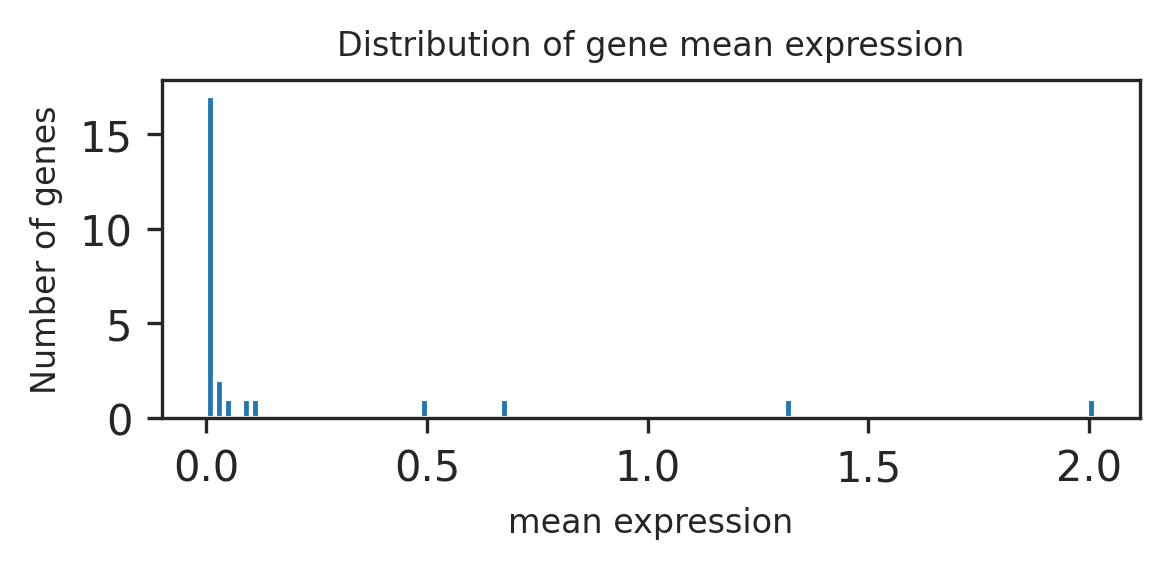

In [73]:
plt.figure(figsize=(4,2))
plt.hist(gene_stats["mean"], bins=100)
plt.xlabel("mean expression", fontsize=8)
plt.ylabel("Number of genes", fontsize=8)
plt.title("Distribution of gene mean expression", fontsize=8)
plt.tight_layout()
plt.show()

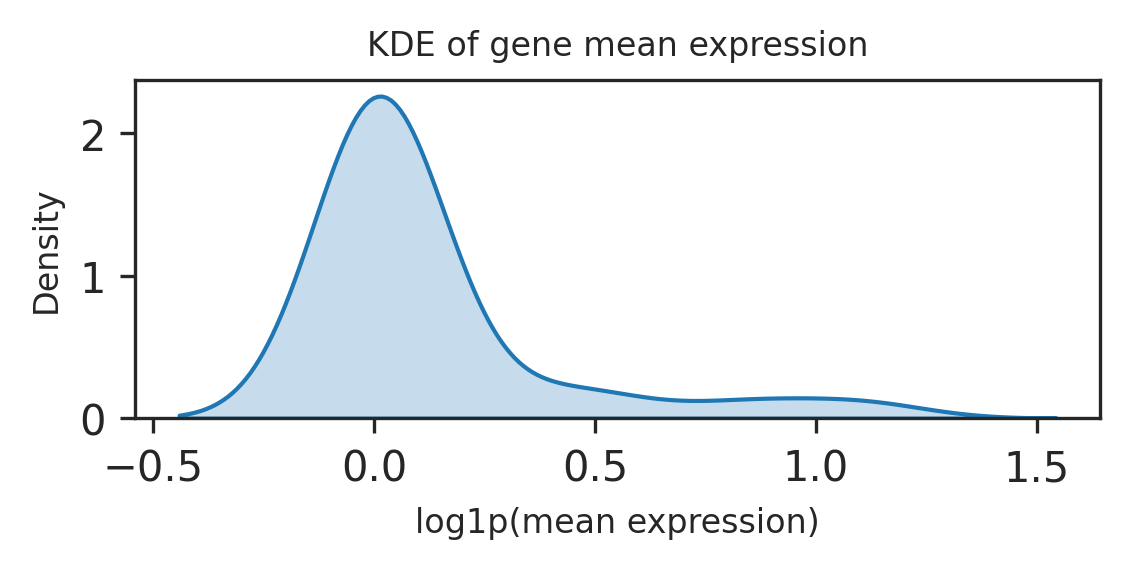

In [75]:
plt.figure(figsize=(4,2))
sns.kdeplot(np.log1p(gene_stats["mean"]), fill=True)
plt.xlabel("log1p(mean expression)", fontsize=8)
plt.ylabel("Density", fontsize=8)
plt.title("KDE of gene mean expression", fontsize=8)
plt.tight_layout()
plt.show()

# Thresholding (Example)

**DON'T RUN THIS SECTION YET!!!!!!**

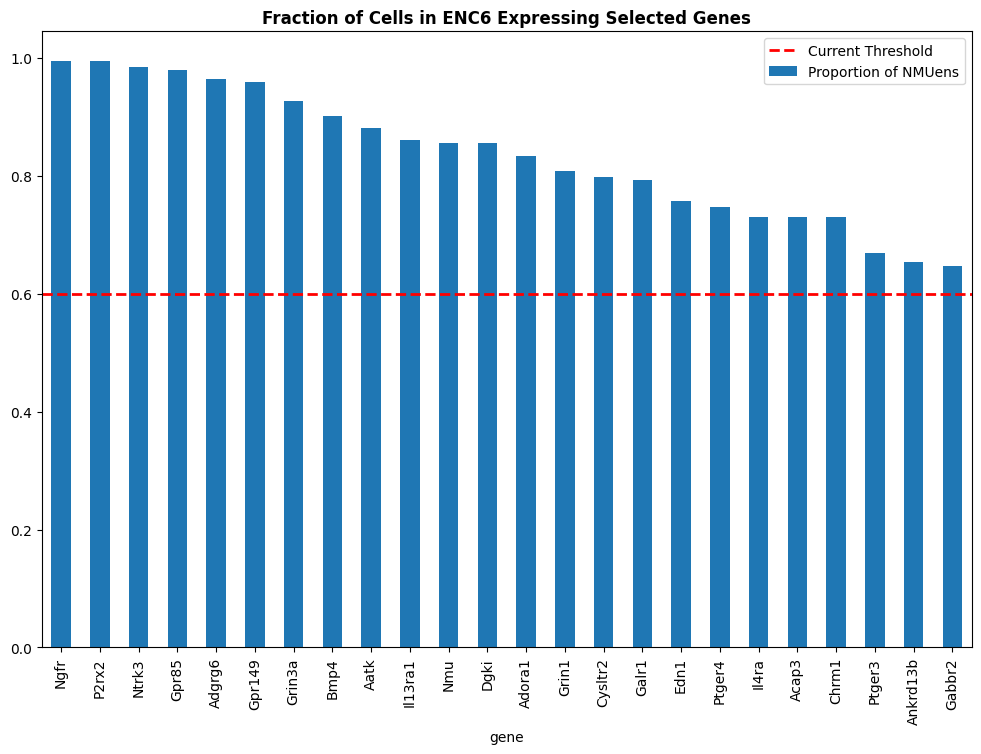

In [106]:
proportions_df.plot(kind='bar', x='gene', y='proportion_NMUens', figsize=(12, 8), label='Proportion of NMUens')
plt.title('Fraction of Cells in ENC6 Expressing Selected Genes', fontweight='bold')
plt.axhline(y=0.6, color='red', linestyle='--', linewidth=2, label='Current Threshold')
plt.legend()
plt.show()

In [102]:
NMUens_obs = NMUens_obs.drop(columns=['celltype'])
mean_df = NMUens_obs.mean()
mean_df

gene
Bmp4        1.052853
Edn1        1.098309
Nmu         2.056751
Ankrd13b    0.587411
Acap3       0.687817
Dgki        0.912556
Ntrk3       2.431499
Aatk        1.152228
Grin3a      1.567921
Grin1       0.981695
Gpr149      1.737309
Gpr85       2.080337
Chrm1       0.782504
Adora1      1.138553
Adgrg6      2.900169
Gabbr2      0.612840
Cysltr2     0.865058
Galr1       1.476607
Ngfr        2.200086
Il13ra1     0.926795
Il4ra       0.688442
Ptger3      0.639910
Ptger4      0.828927
P2rx2       2.430802
dtype: float32

In [103]:
mean_df = pd.DataFrame(mean_df)
mean_df = mean_df.rename(columns={0:'mean_expression'})
mean_df = mean_df.reset_index()
mean_df = mean_df.sort_values(by='mean_expression', ascending=False)
mean_df

,gene,mean_expression
14,Adgrg6,2.900169
6,Ntrk3,2.431499
23,P2rx2,2.430802
18,Ngfr,2.200086
11,Gpr85,2.080337
2,Nmu,2.056751
10,Gpr149,1.737309
8,Grin3a,1.567921
17,Galr1,1.476607
7,Aatk,1.152228


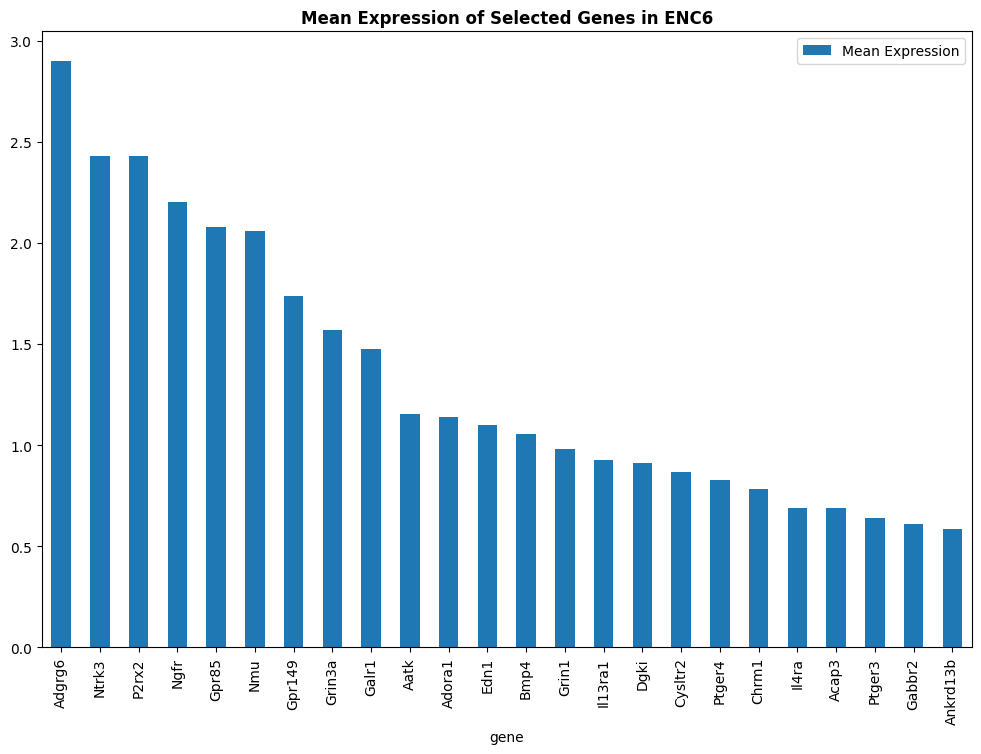

In [104]:
mean_df.plot(kind='bar', x='gene', y='mean_expression', figsize=(12, 8), label='Mean Expression')
plt.title('Mean Expression of Selected Genes in ENC6', fontweight='bold')
# plt.axhline(y=1.5, color='red', linestyle='--', linewidth=2, label='Current Threshold')
plt.legend()
plt.show()